In [1]:
import sys
print(f'Python version: {sys.version_info.major}.{sys.version_info.minor}')
import librosa

import tensorflow as tf
tf_version = tf.__version__.split('.')
print(f'Tensorflow version: {".".join(tf_version[0:2])}')
import numpy as np
from matplotlib import pyplot as plt

Python version: 3.9
Tensorflow version: 2.10


In [2]:
from vggish.preprocess_sound import preprocess_sound
from vggish.vggish_postprocess import Postprocessor

from vggish import vggish_params

In [3]:
file = 'E:embeddings/dataset/samples/16000/test/01_556_gunshots,shot2000m.12.ch01.180718.163406.60..wav'
vggish_weights = f'../data/vggish/vggish_audioset_weights.h5'

In [4]:
wave, sr = librosa.load(file, sr=16000)

In [5]:
examples = preprocess_sound(wave, sr)

In [6]:
print(np.min(examples), np.max(examples))

-4.539009236474378 1.1829804694276524


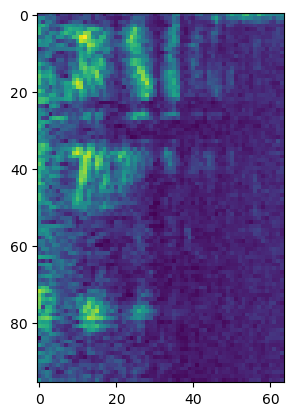

In [7]:
plt.imshow(examples[2])

In [8]:
if tf_version[0] == '1':
    pass
elif tf_version[0] == '2':
    from vggish.vggish import VGGish as vggish
    model = vggish(vggish_weights)
    emb = model.predict(examples)

1/1 [==============================] - 2s 2s/step


In [9]:
postprocessor = Postprocessor(vggish_params.VGGISH_PCA_PARAMS)

postprocessed = postprocessor.postprocess(emb)

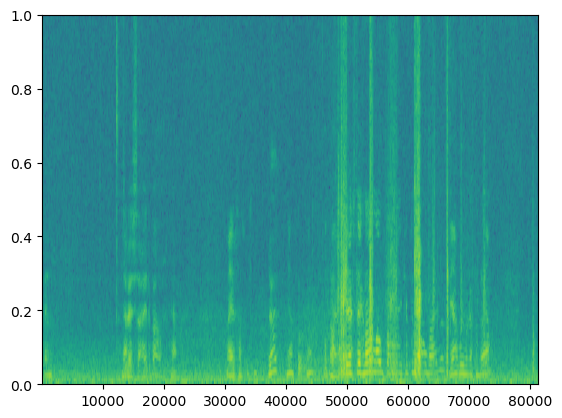

In [10]:
plt.specgram(wave)
plt.show()

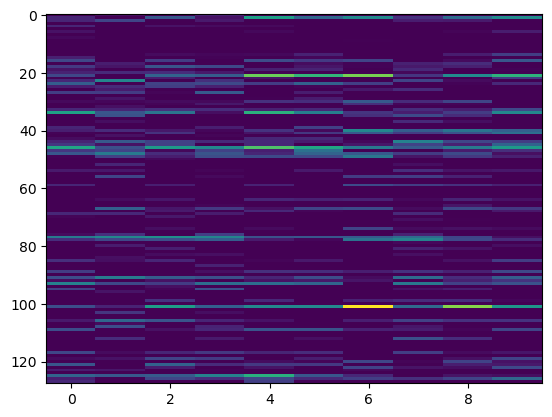

In [11]:
plt.imshow(emb.transpose(), interpolation='none', aspect='auto')

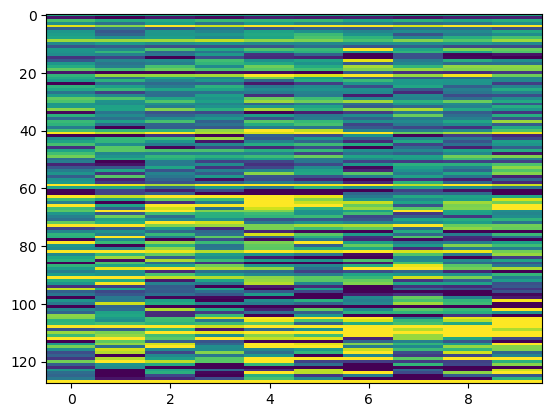

In [12]:
plt.imshow(postprocessed.transpose(), interpolation='none', aspect='auto')

In [25]:
print(postprocessed)

[[154  15 180 ...  84 102 255]
 [144   0 157 ...   0  13 255]
 [152  17 158 ...  56  28 255]
 ...
 [152  13 163 ...   0   0 255]
 [153  22 153 ...  77   2 255]
 [151  24 160 ...  68 165 255]]


In [21]:
(postprocessed * 1.0).dtype

dtype('float64')